<a href="https://colab.research.google.com/github/akanison12/Sudo-code-2024/blob/main/240114_TextEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import data

In [ ]:
!git clone https://github.com/NTT123/viwik18.git
!cat viwik18/dataset/viwik18_* > viwik18.txt


fatal: destination path 'viwik18' already exists and is not an empty directory.


#Import library

In [ ]:
!pip install gensim pyvi


In [ ]:
from gensim.models import Word2Vec
from pyvi import ViTokenizer
from gensim.utils import simple_preprocess

import multiprocessing

#Read Data

In [ ]:
# Read data
with open('viwik18.txt', 'r', encoding='utf-8') as file:
    text = file.read()[:3000000]




#Read Stopword

In [ ]:
#Read  file stop_word
file_path='/content/drive/MyDrive/ Sudo-ccode/W2/vietnamese-stopwords.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    stop_words = set(line.strip() for line in file)

In [ ]:
text

'trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu chuẩn giáo dục và các vấn đề về chính sách với trên một bốn năm tổ chức thành viên và sáu năm không không không thành viên cá nhân isoc bao gồm những con người cụ thể trong cộng đồng internet mọi chi tiết có thể tìm thấy tại website của isoc   internet society nằm ở gần thủ đô washington dc hoa kỳ và geneva thụy sĩ số hội viên của nó bao gồm hơn một bốn năm tổ chức thành viên và hơn sáu năm không không không cá nhân thành viên còn có thể tự lập một chi nhánh của tổ chức tùy theo vị trí hoặc sở thích hiện nay tổ chức có tới chín không chi nhánh trên toàn thế giới   nhiệm vụ và mục đích hoạt động  bảo đảm cổ vũ cho sự phát triển mở rộng và sử dụng internet được thuận lợi nhất cho mọi người trên toàn thế giới   xem thêm   lịch sử internet  liên kết ngoài   isoc việt nam  trang chủ toàn cầu  

#Preprocessing text


*   Tokenization is the process of breaking the text into individual words or terms.
*   applied simple_process to further process the tokenized text into a list of tokens (words) in a simple, standardized format.


*   Remove the stopword
*   Create sentence from token .This is need for Word2Vec in Gensin can work correctly.







In [ ]:

# Tokenizing the text using ViTokenizer:
tokenized_text = ViTokenizer.tokenize(text)
tokens = simple_preprocess(tokenized_text)
tokens = [token for token in tokens if token not in stop_words]

# Splitting tokens into smaller segments with lengths between 10 to 20 words:
def split_into_sentences(tokens, min_len=10, max_len=20):
    sentences = []
    for i in range(0, len(tokens), max_len):
        sentence = tokens[i:i + max_len]
        if len(sentence) >= min_len:
            sentences.append(sentence)
    return sentences

sentences = split_into_sentences(tokens)



In [ ]:
#Set up hyper_parameters
vector_size = 300
window = 5
min_count = 5
sg = 1  # Skip-gram
epochs = 5
workers = multiprocessing.cpu_count()
sample = 1e-3
negative = 10
epoch=5

In [ ]:
#Initializing and training the Word2Vec model.
model = Word2Vec(
    sentences=sentences,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    sg=sg,
    workers=workers,
    sample=sample,
    negative=negative,
)

#Build model Word2Vec in Gensin need 2 function:

*   Build Vocabulary
*   Train








In [ ]:



model.build_vocab(sentences)
print("Done Build Vocabulary")


model.train(sentences, total_examples=model.corpus_count, epochs=5)
print("Done Train")

# Save model
model.save("word2vec_viwik18.model")
print("Save model")



Đã xây dựng từ vựng xong
Đã huấn luyện xong
Đã lưu mô hình xong


#Infenrence

In [ ]:

similar_words = model.wv.most_similar("đại_học", topn=10)
print(similar_words)

[('trường', 0.7861084938049316), ('cao_đẳng', 0.7756809592247009), ('y_khoa', 0.7550831437110901), ('đào_tạo', 0.7344456911087036), ('công_lập', 0.7229584455490112), ('sinh_viên', 0.7198283076286316), ('uc', 0.7116342782974243), ('sư_phạm', 0.7114272117614746), ('trung_cấp', 0.7074382901191711), ('phân_viện', 0.6949934959411621)]


#Visualizing with t-SNE

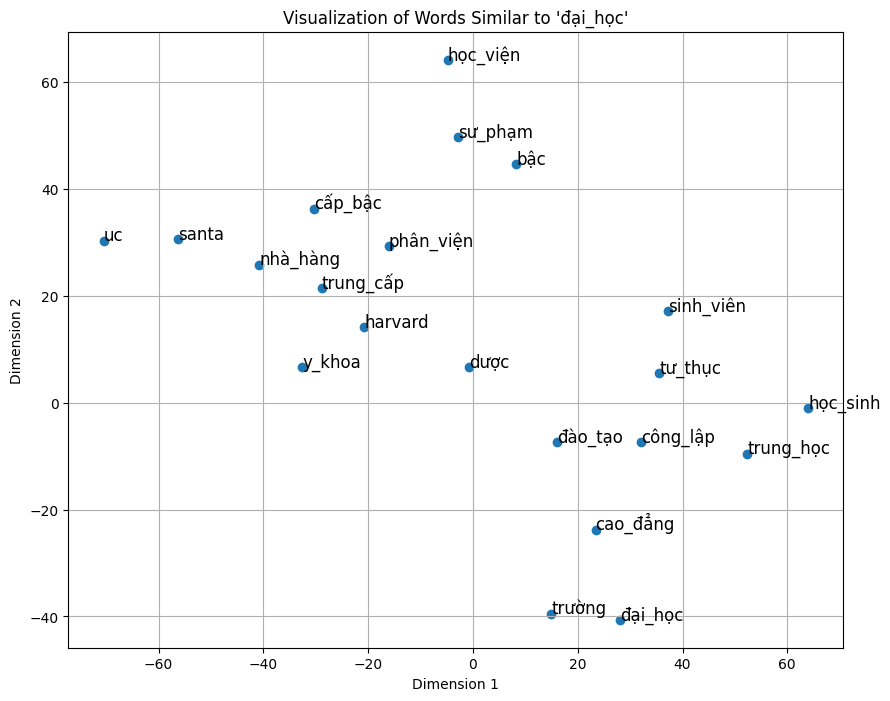

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec


model = Word2Vec.load("word2vec_viwik18.model")


target_word = "đại_học"


similar_words = model.wv.most_similar(target_word, topn=20)


words = [target_word] + [word for word, _ in similar_words]
word_vectors = model.wv[words]


tsne = TSNE(n_components=2, random_state=42,perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title(f"Visualization of Words Similar to '{target_word}'")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

